In [5]:
from google.colab import drive
drive.mount('/content/drive')

#df.to_excel("reddit_data.xlsx")
#df.to_excel("/content/drive/MyDrive/reddit_data.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
#! pip install praw
! pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=c1b337c91f68647cd2944ca0bde44be7259020037c6236f67040009dd7353d47
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import praw
import os
import re
import time
import emoji
from string import punctuation
from collections import Counter, defaultdict
from wordcloud import WordCloud
#from nltk.corpus import stopwords 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
#from reddit_key import api_key, api_key_secret
#from reddit_api import api_key, api_key_secret, user_agent
api_key = '2XnCRLNtkG--5eupA68gtA'
api_key_secret = 'o9ls32MJkJRO1Ko40CFx6vUN6zNb0g'
user_agent = 'ryan_dunn_usd'

In [11]:
user_agent = "example 1.0 by lucho"
reddit= praw.Reddit(
    client_id = api_key,
    client_secret= api_key_secret,
    user_agent = user_agent
)

In [12]:
stock_names2 =['TSLA', 'Tesla', 'Tesla Inc.', 'Tesla Corporation',
               'LYFT', 'Lyft', 'Lyft Inc.', 'Lyft Corporation',
               'BBD', 'Bombardier', 'Bombardier Inc.',
               'F', 'Ford', 'Ford Motor', 'Ford Motor Company',
               'AAPL', 'Apple', 'Apple Inc.',
               'NVDA', 'NVIDIA', 'NVIDIA Corporation',
               'GOOGL', 'Alphabet', 'Alphabet Inc.', 'Google', 'Google Inc.',
               'AMZN', 'Amazon', 'Amazon.com', 'Amazon.com Inc.',
               'AMD', 'Advanced Micro Devices', 'Advanced Micro Devices Inc.',
               'GOOG', 'Alphabet', 'Alphabet Inc.', 'Google', 'Google Inc.',
               'ITUB', 'Itau Unibanco', 'Itau Unibanco Holding', 'Itau Unibanco Holding S.A.',
               'PLTR', 'Palantir Technologies', 'Palantir Technologies Inc.',
               'UBER', 'Uber', 'Uber Technologies', 'Uber Technologies Inc.',
               'CCL', 'Carnival', 'Carnival Corporation', 'Carnival Corporation & plc',
               'AMC', 'AMC Entertainment', 'AMC Entertainment Holdings', 'AMC Entertainment Holdings Inc.',
               'NIO', 'NIO', 'NIO Inc.',    'PYPL', 'PayPal', 'PayPal Holdings', 'PayPal Holdings Inc.',
               'SOFI', 'SoFi Technologies', 'SoFi Technologies Inc.',
               'LUMN', 'Lumen Technologies', 'Lumen Technologies Inc.',
               'PBR', 'Petroleo Brasileiro', 'Petroleo Brasileiro S.A.', 'Petrobras',
               'META', 'MetLife', 'MetLife Inc.',
               'BAC', 'Bank of America', 'Bank of America Corporation',
               'INTC', 'Intel', 'Intel Corporation',
               'CS', 'Credit Suisse', 'Credit Suisse Group',
               'Credit Suisse Group AG',
               'APE', 'AP Eagers', 'AP Eagers Limited']

In [13]:
stock_names4 = ['TSLA', 'Tesla', 'Tesla Inc.', 'Tesla Corporation',
                'PLTR', 'Palantir', 'Palantir Technologies Inc.', 'Palantir Corporation',
                'F', 'Ford', 'Ford Motor', 'Ford Motor Company',
                'NVDA', 'Nvidia', 'Nvidia Corporation', 'AAPL', 'Apple', 'Apple Inc.',
                'AMZN', 'Amazon', 'Amazon.com Inc.', 'AMD', 'Advanced Micro Devices', 
                'GOOGL', 'Google', 'Alphabet Inc.',
                'NU', 'Northeast Utilities', 'ITUB',
                'Itau Unibanco Holding SA',
                'GOOG', 'Uber', 'Uber Technologies Inc.',
                'Uber Corporation',
                'MSFT', 'Microsoft', 'Microsoft Corporation',
                'NIO', 'Nio', 'Nio Inc.', 'Nio Corporation',
                'AMC', 'AMC Entertainment', 'AMC Entertainment Holdings Inc.',
                'CCL', 'Carnival', 'Carnival Corporation',
                'LUMN', 'Lumen', 'Lumen Technologies Inc.',
                'LYFT', 'Lyft', 'Lyft Inc.', 'Lyft Corporation',
                'SNAP', 'Snap', 'Snap Inc.',
                'BAC', 'Bank of America', 'Bank of America Corporation',
                'SOFI', 'SoFi', 'SoFi Technologies Inc.',
                'ABEV', 'AmBev', 'AmBev SA',
                'BBD', 'Bombardier', 'Bombardier Inc.',
                'INTC', 'Intel', 'Intel Corporation',
                'AI', 'Arlington', 'Arlington Asset Investment Corp.',
                'CS', 'Credit Suisse', 'Credit Suisse Group AG',
                'APE', 'Apeel', 'Apeel Sciences Inc.',
                'META', 'Metamaterial', 'Metamaterial Inc.',
                'COIN', 'Coinbase', 'Coinbase Global Inc.',
                'T', 'AT&T', 'AT&T Inc.',
                'AFRM', 'Affirm', 'Affirm Holdings Inc.',
                'SWN', 'Southwestern', 'Southwestern Energy Company',
                'CLF', 'Cleveland', 'Cleveland-Cliffs Inc.', 
                'DNA', 'Sphereon', 'Sphere 3D Corp.', 'GOLD',
                'Barrick', 'Barrick Gold Corporation',
                'GRAB', 'Grab', 'Grab Holdings Inc.',
                'CSCO', 'Cisco', 'Cisco Systems Inc.',
                'PYPL', 'PayPal', 'PayPal Holdings Inc.',
                'SHOP', 'Shopify', 'Shopify Inc.',
                'CMCSA', 'Comcast', 'Comcast Corporation',
                'LCID', 'Lucid', 'Lucid Group Inc.',
                'BTG', 'B2Gold', 'B2Gold Corp.',
                'KO', 'Coca-Cola', 'The Coca-Cola Company',
                'PFE', 'Pfizer', 'Pfizer Inc.',
                'AAL', 'American Airlines', 'American Airlines Group Inc.',
                'BTU', 'Peabody', 'Peabody Energy Corporation',
                'RIVN', 'Rivian', 'Rivian Automotive Inc.',
                'WFC', 'Wells Fargo', 'Wells Fargo & Company',
                'C', 'Citigroup', 'Citigroup Inc.',
                'PBR', 'Petrobras', 'Petroleo Brasileiro SA']

In [14]:
subreddits = ['stockmarket', 'investing', 'wallstreetbets',
              'Wallstreetbetsnew','WallStreetbetsELITE',
              'stocks','StockMarket','investing',
              'SPACs', 'options','Daytrading','Shortsqueeze',
              'SqueezePlays']

#### Do not run the below 2 code blocks, as it will re-collect the source data. Instead, navigate to the next code block and import the dataframe that is created from the below code block:

In [10]:
# Define regular expression pattern to match stock symbols
symbol_pattern = re.compile(r'\b(' + '|'.join(stock_names4) + r')\b', re.IGNORECASE)

data = {
    'headline': [],
    'headline_score': [],
    'comment': [],
    'comment_score': [],
    'stock_name': [],
    'subreddit_name': []
}
seen_headlines = set()
start_time = time.time()

for subreddit in subreddits:
    for post_type in ['hot', 'new']:
        for submission in reddit.subreddit(subreddit).__getattribute__(post_type)(limit=None):
            if submission.title not in seen_headlines and symbol_pattern.search(submission.title):
                seen_headlines.add(submission.title)
                data['headline'].append(submission.title)
                data['headline_score'].append(submission.score)
                data['stock_name'].append(symbol_pattern.search(submission.title).group(0))
                data['subreddit_name'].append(subreddit)
                submission.comments.replace_more(limit=0)
                comment_counter = 0
                for comment in submission.comments.list():
                    if comment.body and comment.score:
                        data['comment'].append(comment.body)
                        data['comment_score'].append(comment.score)
                        comment_counter += 1
                        if comment_counter >= 100:
                            break

end_time = time.time()
run_time = end_time - start_time
print(f"Code run time: {run_time} seconds")


Streaming output truncated to the last 5000 lines.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.r

Code run time: 2807.0438735485077 seconds


In [38]:
# Create an empty list for the modified data
new_data = {'stock name': [],'subreddit': [],'headline': [], 'headline_score': [], 'comment': []}

# Loop over the original data
for i in range(len(data['headline'])):
    # Get the stock name, headline, and score
    stock = data['stock name'][i]
    headline = data['headline'][i]
    score = data['headline_score'][i]
    subreddit = data['subreddit'][i]
    
    # Get the comments for this headline
    comments = data['comment'][i*3:(i+1)*3] # Assumes up to 3 comments per headline
    
    # Add a new row for each comment
    for comment in comments:
        new_data['stock name'].append(stock)
        new_data['subreddit'].append(subreddit)
        new_data['headline'].append(headline)
        new_data['headline_score'].append(score)
        new_data['comment'].append([comment] if comment is not None else [])

# Create the DataFrame
df = pd.DataFrame(new_data)
df.shape

(3345, 5)

#### Load the data directly from a saved Excel file here:

In [39]:
data = pd.read_excel("/content/drive/My Drive/reddit_data.xlsx", header = 0)
data = pd.DataFrame(data)
print(data.shape)
data.head()

(3345, 5)


,stock name,subreddit,headline,headline_score,comment
0,AI,stockmarket,Using Bing's AI search engine and asking which...,52.0,"[""Cool experiment but wouldn't recommend anyon..."
1,AI,stockmarket,Using Bing's AI search engine and asking which...,52.0,['Puts on msft']
2,AI,stockmarket,Using Bing's AI search engine and asking which...,52.0,['Does it give you the same stock picks when y...
3,tesla,stockmarket,Do you think tesla (TSLA) might rally heading ...,773.0,['LOL']
4,tesla,stockmarket,Do you think tesla (TSLA) might rally heading ...,773.0,['already priced in']


In [40]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [53]:
# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

#find the count of emojis within the dataframe
def contains_emoji(s):
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]
    return(len(emojis) > 0)

#remove the stop workds from the dataframe
def remove_stop(tokens) :
    stop_words = set(stopwords.words("english"))
    return [word for word in tokens if word.lower() not in stop_words]
 
#remove the punctuation from the dataframe
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

#create the tokens by splitting on whitespace
def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    return re.split(whitespace_pattern, text)

#defind the function for preparing the data for the pipeline
def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)

In [58]:
#apply the pipeline to the reddit dataframe
reddit_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

#create the tokens column and the number of tokens per column
data["tokens"] = data["comment"].apply(prepare,pipeline= reddit_pipeline)
data["num_tokens"] = data["tokens"].map(len) 
data['has_emoji'] = data["comment"].apply(contains_emoji)
data.head()

,stock name,subreddit,headline,headline_score,comment,tokens,num_tokens,has_emoji
0,AI,stockmarket,Using Bing's AI search engine and asking which...,52.0,"[""Cool experiment but wouldn't recommend anyon...","[cool, experiment, wouldnt, recommend, anyone,...",24,False
1,AI,stockmarket,Using Bing's AI search engine and asking which...,52.0,['Puts on msft'],"[puts, msft]",2,False
2,AI,stockmarket,Using Bing's AI search engine and asking which...,52.0,['Does it give you the same stock picks when y...,"[give, stock, picks, refresh, real, question]",6,False
3,tesla,stockmarket,Do you think tesla (TSLA) might rally heading ...,773.0,['LOL'],[lol],1,False
4,tesla,stockmarket,Do you think tesla (TSLA) might rally heading ...,773.0,['already priced in'],"[already, priced]",2,False


In [62]:
#create the descriptive statistics function
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """
    total_types = []
    true_total = []
    num_tokens = 0
    num_unique_tokens = 0
    lexical_diversity = 0.0
    num_characters = 0

    #get unique list of tokens
    for token in tokens:
        #print(token)
        for i in token:
            true_total.append(i)
            num_tokens += 1
            if i in total_types:
                pass
            else:
                total_types.append(i)
                num_unique_tokens += 1
            for character in i:
                num_characters +=1
                
    lexical_diversity = round(num_unique_tokens / num_tokens , 3)
                
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")    

    #collect the 5 most common tokens
    counter_list = Counter(true_total)
    top_5 = counter_list.most_common(5)
    print(top_5)

    return([num_tokens, num_unique_tokens,lexical_diversity,num_characters])

In [63]:
#return the descriptive stats for the reddit data (tokens column)
descriptive_stats(data['tokens'])

There are 58262 tokens in the data.
There are 10778 unique tokens in the data.
There are 351732 characters in the data.
The lexical diversity is 0.185 in the data.
[('like', 364), ('people', 308), ('would', 304), ('market', 281), ('money', 280)]


[58262, 10778, 0.185, 351732]

In [37]:
df_grouped = df.groupby(['stock name','subreddit','headline']).agg({'headline_score': 'first', 'comment': lambda x: list(x)})
df_grouped.head()

headline_score  \
stock name subreddit      headline                                                             
AFRM       wallstreetbets AFRM - options                                               115.0   
                          Earnings short to make your adicks and aclits AFRM            60.0   
AI         investing      Can we talk about investing in AI - How do you ...             1.0   
                          Could AI make human equity analysts obsolete?                 17.0   
                          I have a market asymmetric knowledge on the AI/...             0.0   

                                                                                                                        comment  
stock name subreddit      headline                                                                                               
AFRM       wallstreetbets AFRM - options                                      [[['EPS is down significantly due to the 1 tim...  
                          Earnings short to make your adicks and aclits AFRM  [[["They aren't even transparent with regards ...  
AI         investing      Can we talk about investing in AI - How do you ...  [[['i hold a lot of meta but this is a disinge...  
                          Could AI make human equity analysts obsolete?       [[['You had enough money to buy it when it was...  
                          I have a market asymmetric knowledge on the AI/...  [[['Google does not give guidance, ever.']], [...

In [16]:
#export the data to csv
#df_grouped.to_csv('df.csv', index_label='stock name', encoding='utf-8')

In [67]:
#create word clouds by subreddit
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [81]:
#create the total reddit wordcloud
reddit_cloud = count_words(data)

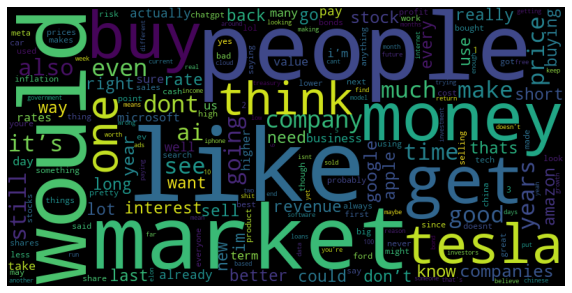

In [78]:
#make the wordcloud larger for better vizability (all subreddits included)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(reddit_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

In [86]:
df_wallstreetbets = data[data['subreddit'] == 'wallstreetbets'].copy()
df_stockmarket = data[data['subreddit'] == 'stockmarket'].copy()
#df_wallstreetbets.head()

In [87]:
wallst_cloud = count_words(df_wallstreetbets)
stockmk_cloud = count_words(df_stockmarket)

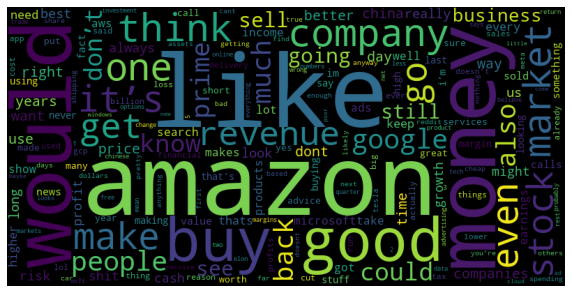

In [84]:
#make the wordcloud larger for better vizability (all subreddits included)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(wallst_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

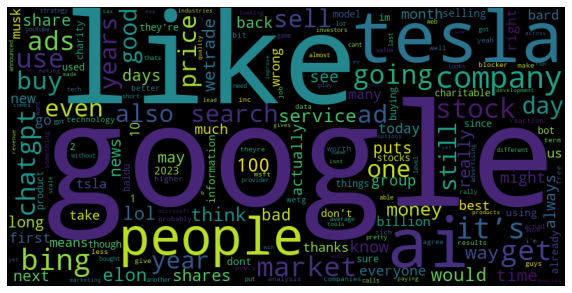

In [88]:
#make the wordcloud larger for better vizability (all subreddits included)
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(stockmk_cloud['freq'])

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()